# FETAL HEALTH STUDY 

Fetal health is a major concern during pregnancy, as health problems that arise during fetal development can have serious consequences for the newborn and its long-term health. One of the most commonly used methods for monitoring fetal health during pregnancy is the cardiotocogram (CTG), which measures the fetal heart rate and the mother's uterine contractions.

The use of machine learning in the interpretation of CTG data has become a promising field of research in obstetrics and gynecology. Machine learning, in combination with CTG data, has the potential to identify patterns that medical professionals can use to predict fetal health problems, such as fetal hypoxia, a condition that occurs when the fetus does not receive enough oxygen and nutrients through the placenta.

In these studies, CTG data are collected from pregnant women and machine learning algorithms are used to process the data and create predictive models that can identify patterns that indicate fetal health problems. Predictive models can help medical professionals detect fetal health problems earlier, which can improve pregnancy outcomes and reduce the risk of serious 
complications.

In the present project, a small investigation will be carried out on the data, applying different methods and algorithms for a good prediction.

**Csv from:** 
https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification?resource=download

**Citation:**
Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318

-------

María Sauras Fenández

Date: 21/02/23



In [2]:
# Libraries for EDA
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for ML
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import scikitplot as skplt

## 1. EDA

In [3]:
fetal_health = pd.read_csv('fetal_health.csv')
fetal_health.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


**1.1 Dataframe characteristics**

In [4]:
# dimension
fetal_health.shape

(2126, 22)

In [5]:
fetal_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
fetal_health.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


***Conclusions:***

As we can see in the table above, we do not need to apply processing to the data for the elimination of the Nans since there is no empty data.

Moreover, it is also observed that all the data are numerical data, so it will not be fatal to make transformations from categorical to numerical data.

**1.2 Data Analysis**

In [7]:
class Data_analysis():
    def __init__(self,df) -> None:
        self.df = df
    
    def data_std(self,col):
        print(self.df[col].describe())
    
    def histogram(self):
        fig,ax=plt.subplots(7,3,figsize=(20,30))
        ax=ax.ravel()
        features = self.df
        features=features.drop('fetal_health',axis=1)
        for i, col in enumerate(features.columns):
            sns.histplot(self.df,x=col,hue='fetal_health',kde=True,bins=80,ax=ax[i],palette='Set2',alpha=0.4)
            ax[i].set_title(col)
            ax[i].grid()
        plt.tight_layout()

    
    def barplot_counts(self,title):
        g0=sns.countplot(self.df, x='fetal_health', hue='fetal_health',palette='Set2',dodge=False)
        g0.bar_label(g0.containers[0]);
        g0.bar_label(g0.containers[1]);
        g0.bar_label(g0.containers[2]);
        plt.title(title)
    
    def most_correlated(self):
        df_corr = self.df.corr()
        for i in range(len(df_corr)):
            df_corr.iloc[i, i] = 0.0
            
        corr_idx = df_corr.abs().idxmax()
        correlations = []
        for index, column in zip(corr_idx.index, corr_idx):
            correlations += [df_corr[index][column]]
            
        df_corr = pd.DataFrame(corr_idx)
        df_corr.columns = ["Most correlated feature"]
        df_corr["correlation"] = correlations
        most_corr = pd.DataFrame(df_corr.iloc[df_corr["correlation"].abs().argsort()[::-1]])
        return most_corr

    def boxplot(self):
        fig, ax = plt.subplots(figsize=(30,10))
        sns.boxplot(ax=ax, data=self.df, orient='h')

    def heat_map(self):
        plt.figure(figsize=(16,9))
        sns.heatmap(self.df.corr(),cmap="coolwarm",annot=True)

        

In [8]:
da = Data_analysis(fetal_health)

**ESTUDIO GENERAL**

*DIAGNOSTIC FREQUENCY*

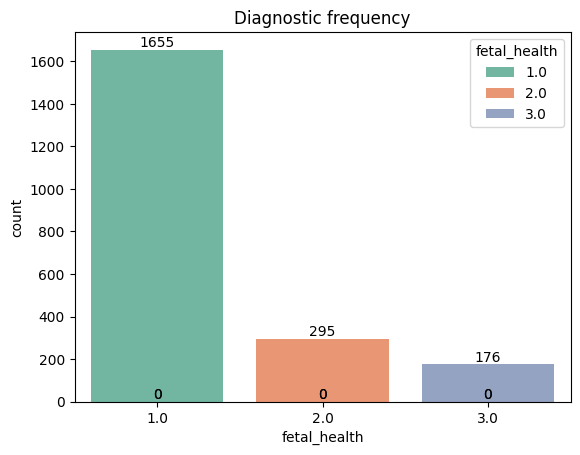

In [9]:
da.barplot_counts('Diagnostic frequency')

The main objective of the graph above is to observe which diagnosis is the most common and the least common.

As can be seen, we have a high density of patients diagnosed with a normal fetus, i.e. in good health, while the least common is a diagnosis of existing pathology.

In addition, an unbalance of the data is evident, which will lead to class 1 being dominant, so it will be necessary to use techniques that balance the data to make a more robust algorithm.

In [10]:
da.data_std('fetal_health')

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64


By visualizing the statistics of a column, more specifically of 'fetal_health' we want to facilitate the understanding of the fetal status and the visualization also facilitates the detection of fetal patterns (Normal, Suspected pathology, Pathological).

*HISTOGRAM STUDY*

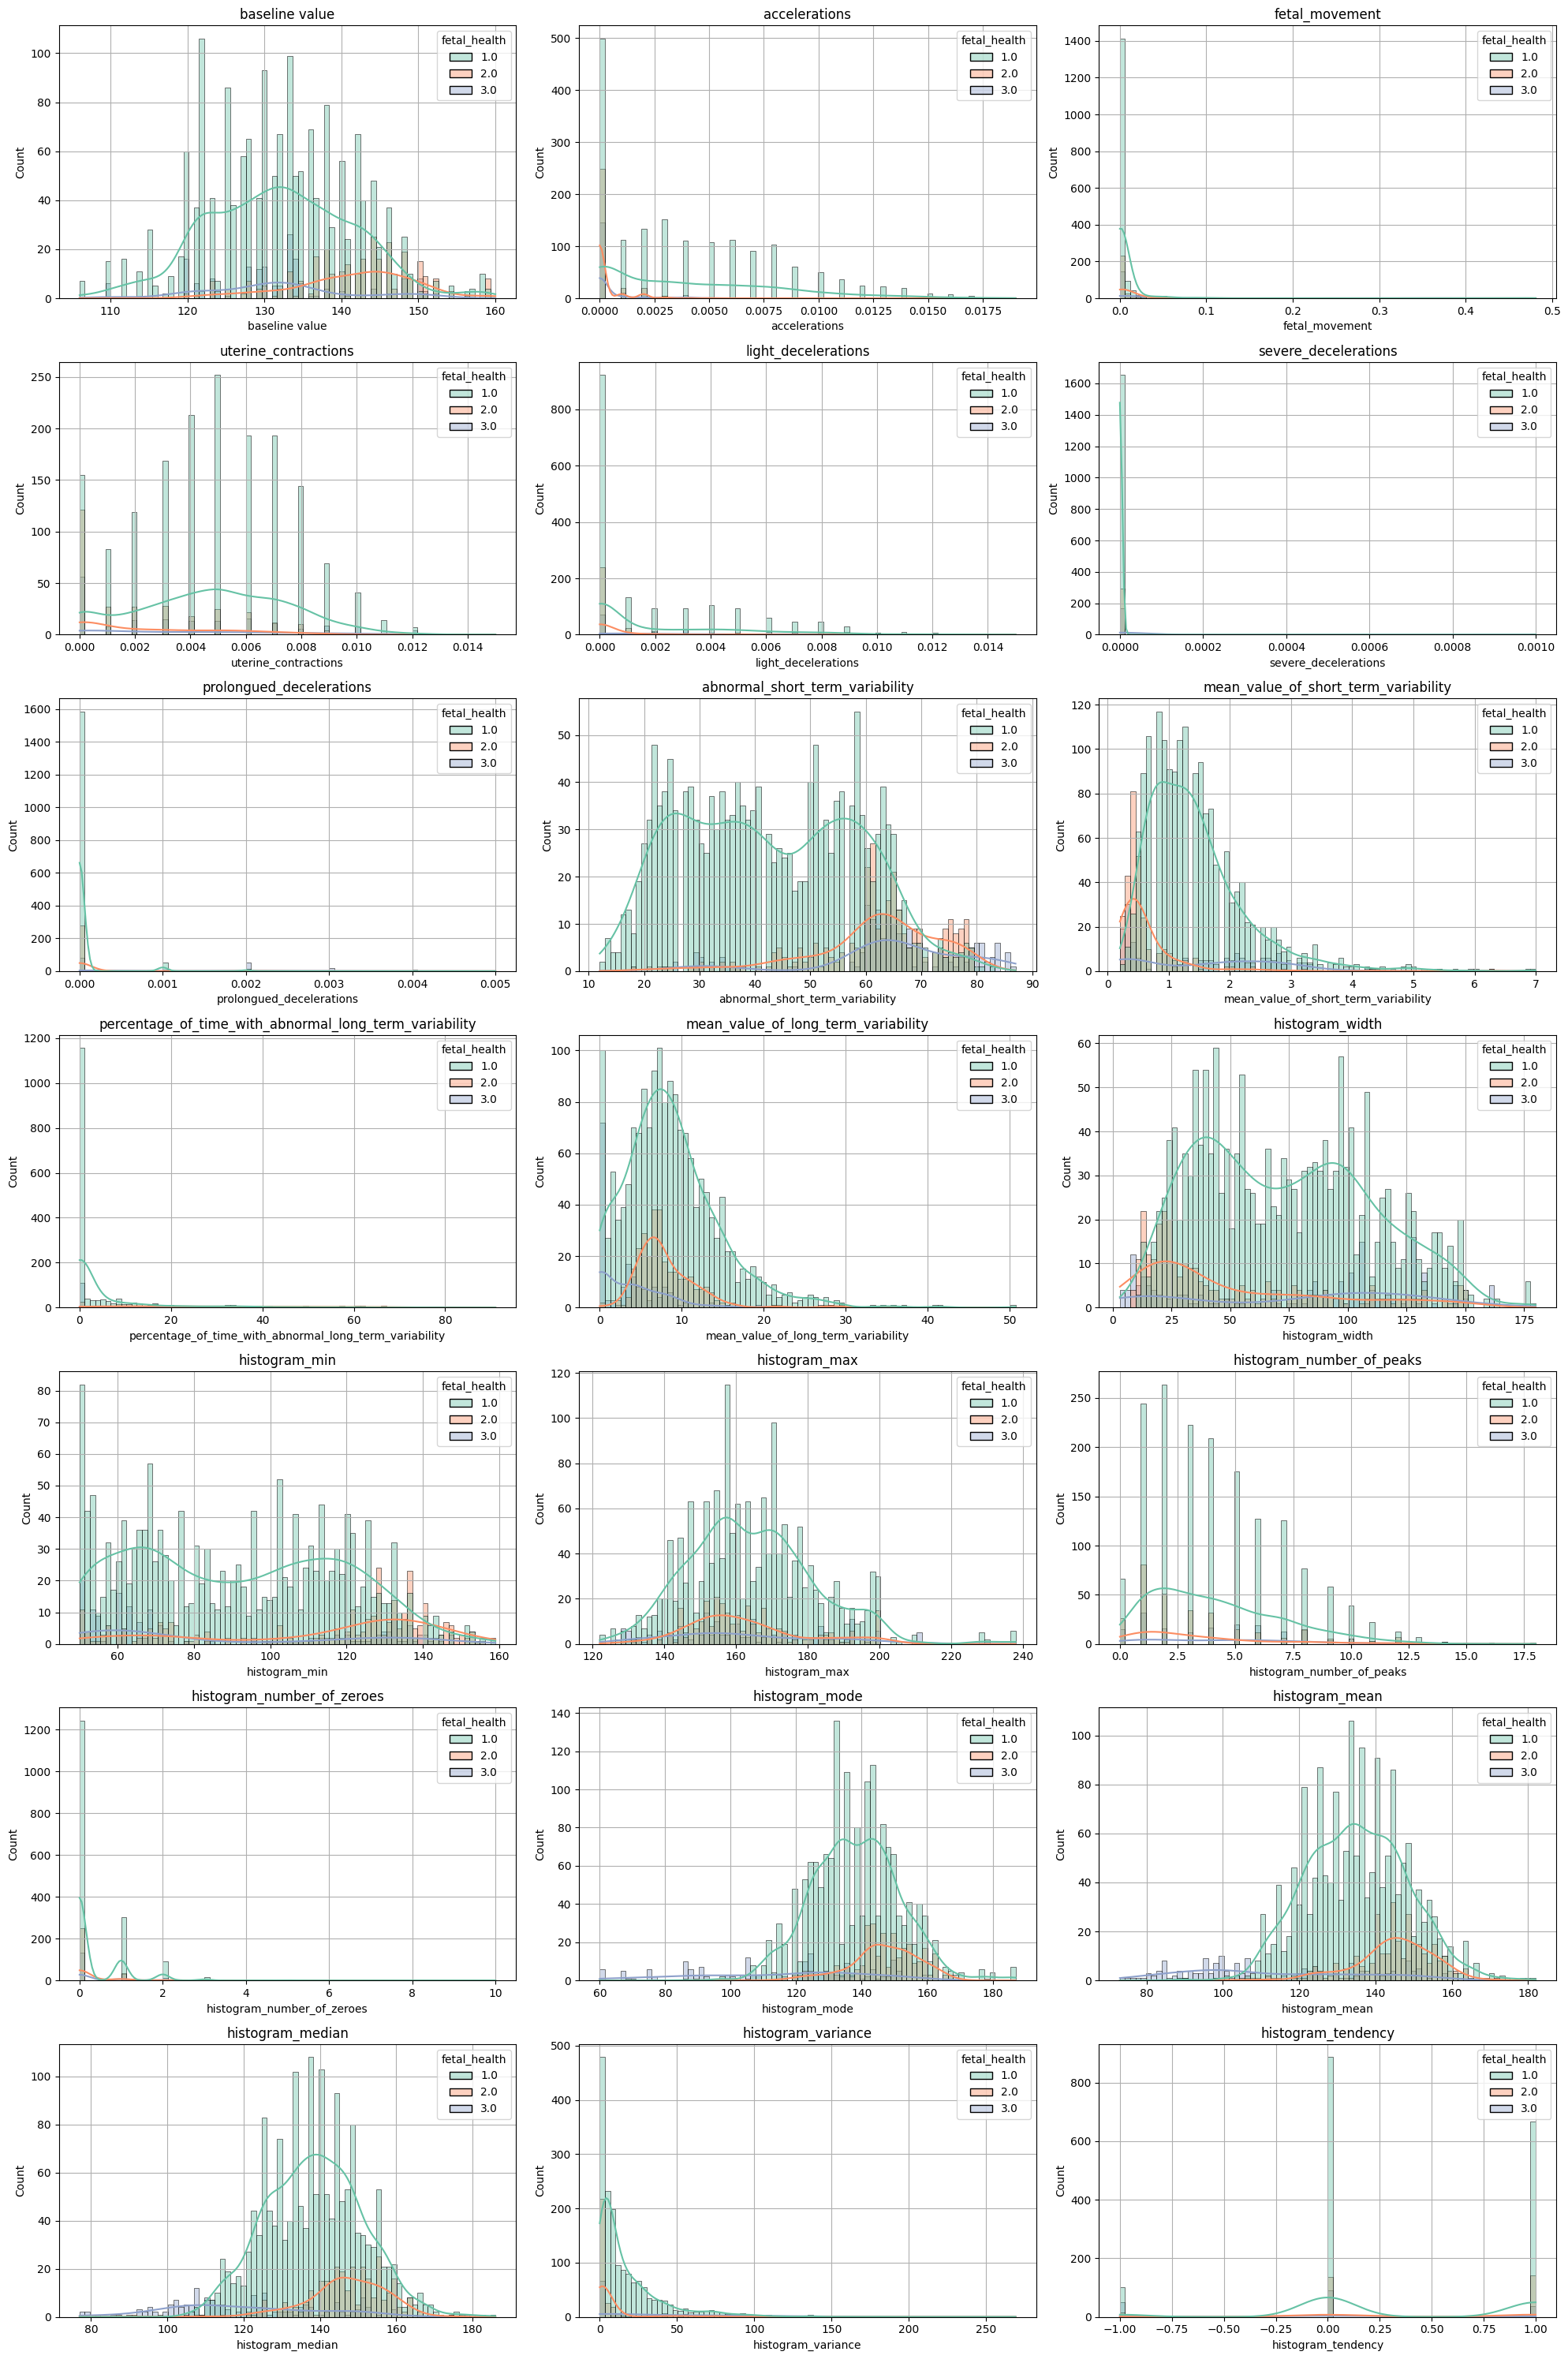

In [69]:
da.histogram()

Thanks to the graphs extracted above, we obtain information on how the data are distributed according to the health of the fetus (1 --> Healthy // 2 --> Suspected pathology // 3 --> Pathology).

For example, in the mean_lvalue_of_long_term_variability, we see that each of the three classes to be studied are concentrated in the set between (5,10) so these values would be attributed to all three classes. 
Conversely, in the mean_lvalue_of_short_term_variability, we see that a value between (0,0.5) would be attributed to possible pathologies. 

Since we have less data in the classes 'Suspicious' and 'Pathology' it is normal that less data is evident, however, looking closely, we can see how in the prolonged_decelerations variable the 'Healthy' class is mostly in the value 0 while the pathology class is distributed throughout the numerical plane, thus, it can be concluded that it is an important variable for the detection of pathologies.

**Additional information:**

- *Prolonged deceleration:* Abnormal fetal heart rate (FHR) finding. This is a deceleration of the FHR that usually lasts between 2 and 10 minutes, but may last longer than 10 minutes.


*BOX PLOT x OUTLIERS*

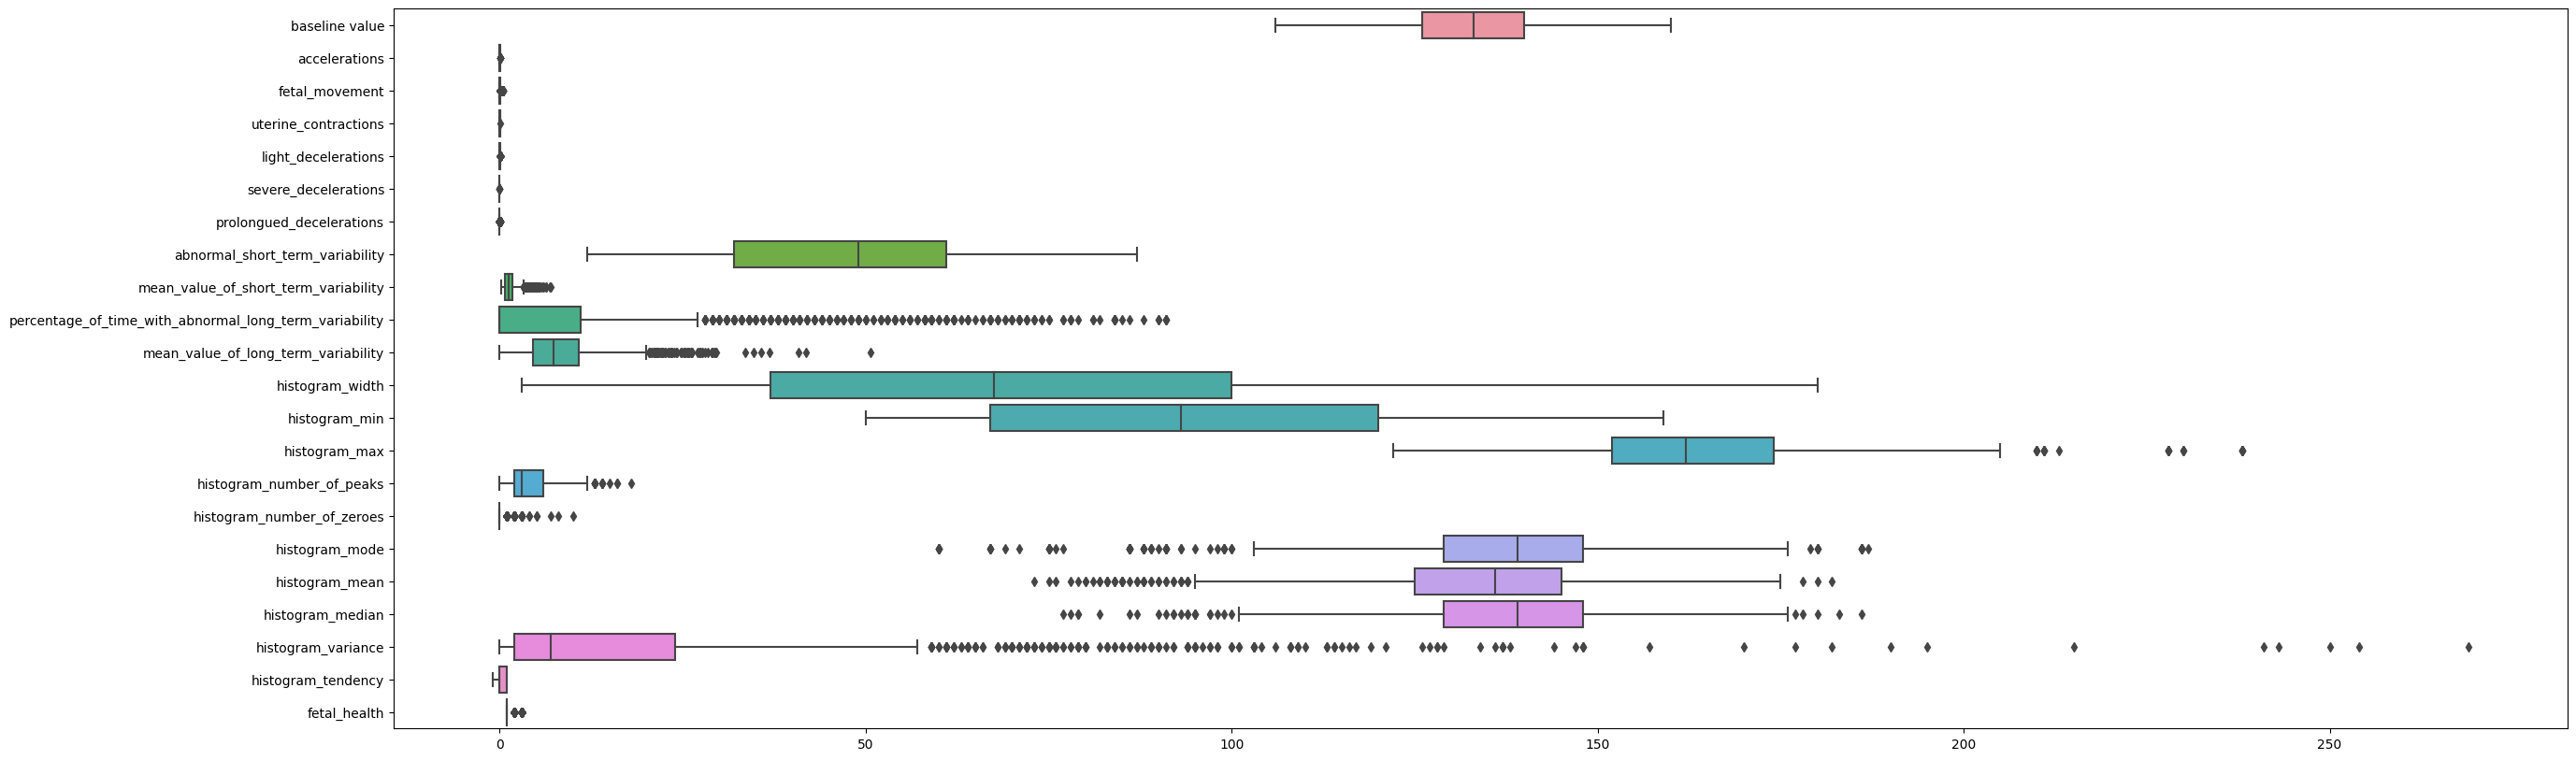

In [11]:
da.boxplot()

*The BoxPlot is a graphical tool in descriptive statistics that allows a more detailed and concise analysis of the distribution of the data in the sample. 

**CONCLUSIONS**

The boxplot has been implemented, in our case, to observe outliers (*Outliers are values that can give you key points within the data you are analyzing and can help you look for inconsistencies and errors within your statistical processes*). 

In our case, the outliers are very numerous and scattered throughout the data set. To brutally eliminate them would not only reduce the dataset considerably, but we could lose valuable information on suspicious or pathological cases. Given the nature of the problem in which class 1 (healthy fetus) predominates, in order to avoid possible inconsistencies in the

**STUDY OF FETUSES WITH PATHOLOGY, SUSPECTED PATHOLOGY AND HEALTHY FETUSES**.

*PATHOLOGY STUDY*

In [12]:
pat = fetal_health[fetal_health['fetal_health'] == 3]
pat = pat.drop(['fetal_health'],axis = 1)

In [13]:
da = Data_analysis(pat)

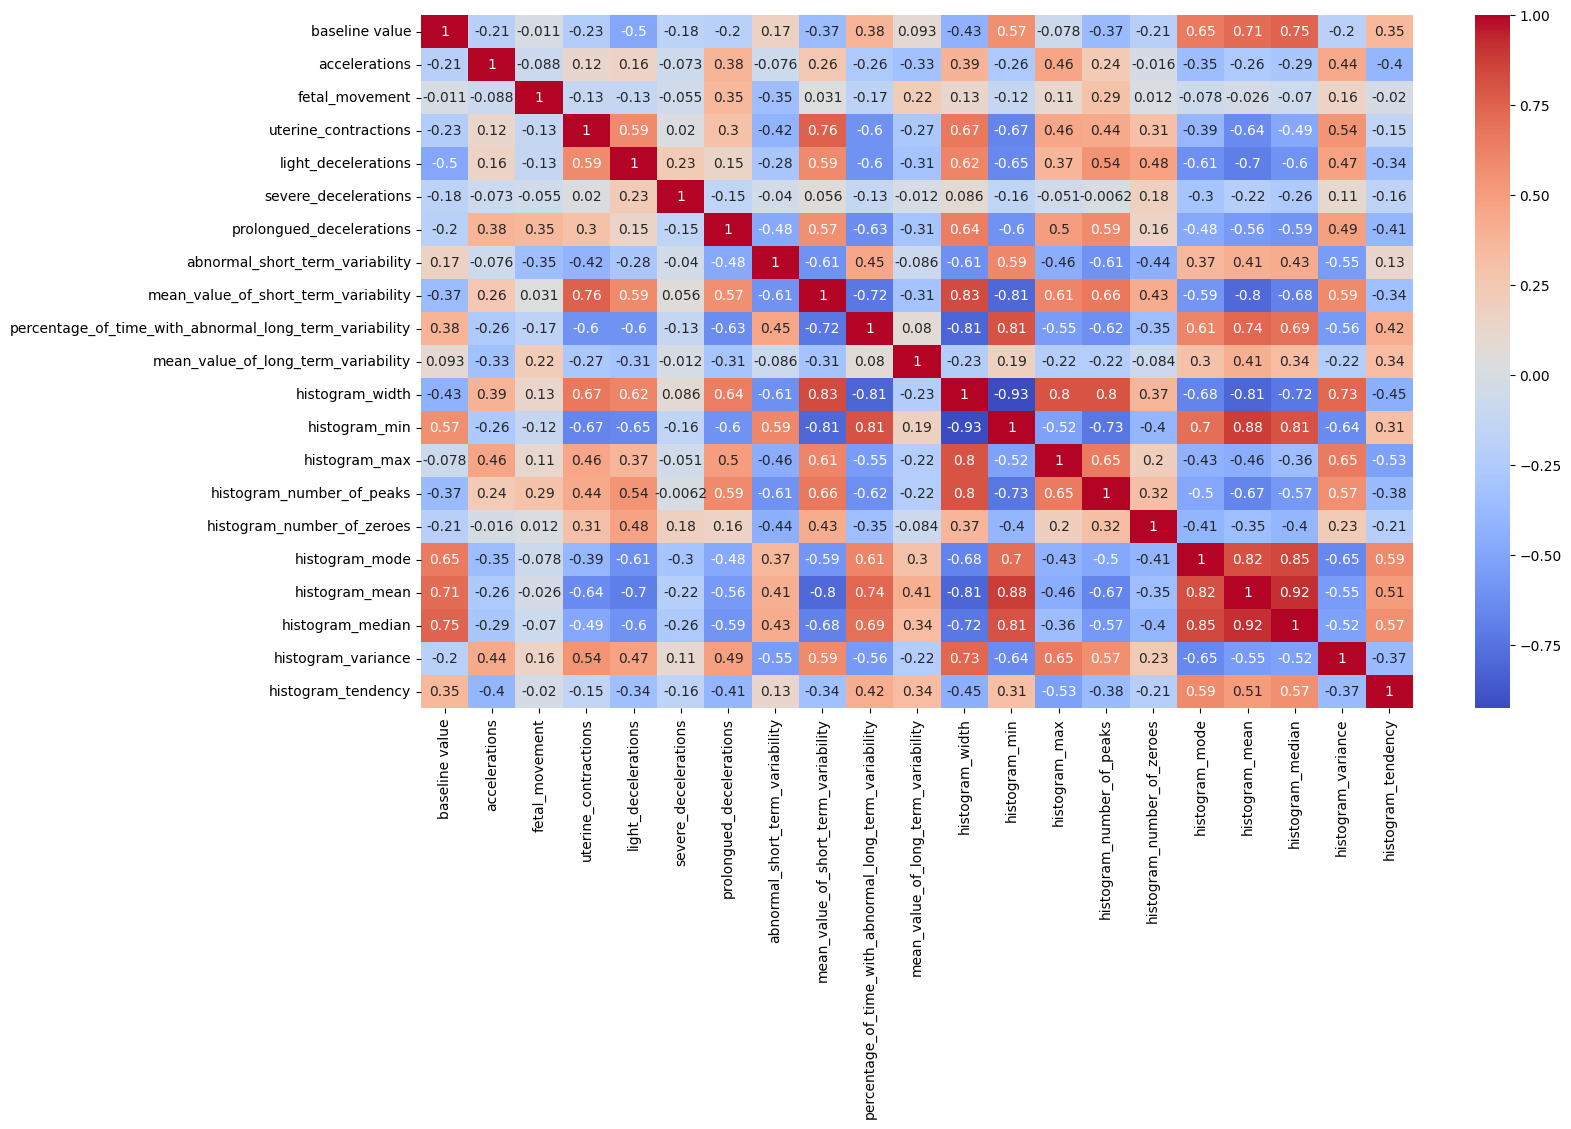

In [14]:
da.heat_map()

**---- CONCLUSIONS ----**

As evidenced in the graph above, there is a high correlation between different variables, taking into consideration apart from all those related to the histograms, since using cold logic, these will have a high correlation.

*Uterine_contractions* 

    * Uterine_contractions w/ mean-value_of_short_term_variability.
    
    * Uterine_contractions w/ light_decelerations.

*light_decelerations:*

    * light_decelerations w/ mean-value_of_short_term_variability.

*Prolonged_decelerations:* 

    * Prolongued_decelerations w/ mean-value_of_short_term_variability.

Obviously a correlation above 0.5 has been chosen to label them as the most important variables.

In [15]:
print('                                     MOST CORRELATED FEATURES')
da.most_correlated()

                                     MOST CORRELATED FEATURES


,Most correlated feature,correlation
histogram_min,histogram_width,-0.926088
histogram_width,histogram_min,-0.926088
histogram_median,histogram_mean,0.916188
histogram_mean,histogram_median,0.916188
histogram_mode,histogram_median,0.847122
mean_value_of_short_term_variability,histogram_width,0.831398
percentage_of_time_with_abnormal_long_term_variability,histogram_min,0.808857
histogram_max,histogram_width,0.803761
histogram_number_of_peaks,histogram_width,0.798519
uterine_contractions,mean_value_of_short_term_variability,0.755323


**Compaction of the variables with the highest correlation between them so that the data give us solid conclusions:** 

When doing this study, it is evident, as mentioned before, that among the variables that correspond to histograms, there is a high correlation. Something curious to see is that the variable *histogram_variance* is found to be highly correlated with *mean_value_of_short_term_variability* and that the variable that is most correlated is *mean_value_of_short_term_variability*.

However, we see very low correlations between different pairs of variables that make up the histogram such as: *histogram_min with histogram_width* and *histogram_trend with histogram_min*.

*SUSPICIOUS DIAGNOSTIC STUDY*

In [16]:
s = fetal_health[fetal_health['fetal_health'] == 2]
s = s.drop(['fetal_health'],axis = 1)

In [17]:
da = Data_analysis(s)

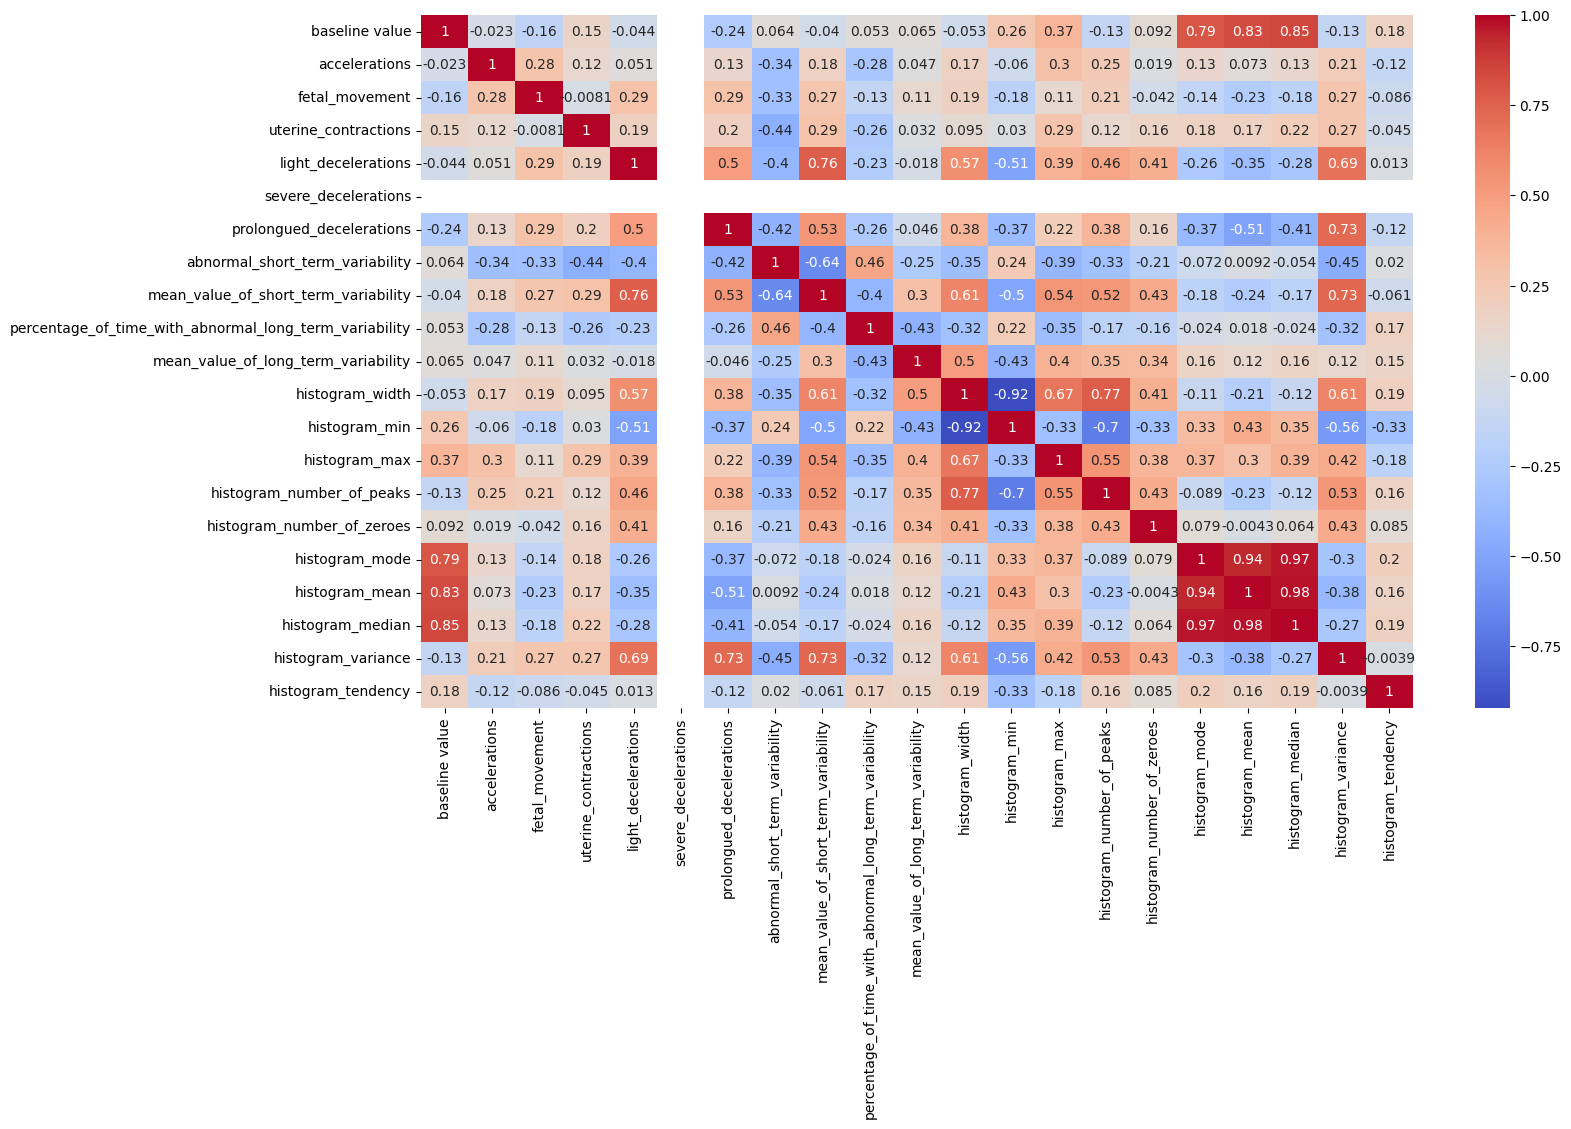

In [18]:
da.heat_map()

**---- CONCLUSIONS ----**

As evidenced in the graph above, there is a high correlation between different variables, taking into consideration apart from all those related to the histograms, since using cold logic, these will have a high correlation.

*light_decelerations:* 

    * light_decelerations w/ mean_value_of_short_term_variability.
    
    * light_decelerations w/ light_decelerations.

*mean_value_of_short_term_variability:*

    * mean_value_of_short_term_variability w/ prolongued_decelerations.

*prolongued_decelerations:*

    * prolongued_decelerations w/ light_decelerations

Obviously a correlation above 0.5 has been chosen to label them as the most important variables.

In [19]:
print('                                     MOST CORRELATED FEATURES')
da.most_correlated()

                                     MOST CORRELATED FEATURES


,Most correlated feature,correlation
histogram_median,histogram_mean,0.975264
histogram_mean,histogram_median,0.975264
histogram_mode,histogram_median,0.965339
histogram_min,histogram_width,-0.920592
histogram_width,histogram_min,-0.920592
baseline value,histogram_median,0.849277
histogram_number_of_peaks,histogram_width,0.774032
light_decelerations,mean_value_of_short_term_variability,0.760826
mean_value_of_short_term_variability,light_decelerations,0.760826
histogram_variance,mean_value_of_short_term_variability,0.732740


**Comparison of the variables with the highest correlation between them**.

Regarding the variables of patients with suspected fetal pathology, a high correlation is found between the following pairs of variables:

As expected, most histogram variables are found to be highly correlated with each other except for some such as *baseline_value* which is found to be highly correlated with *histogram_median*.

Among the pair of variables outside the histogram variables we find *light_decelerations with mean_value_of_short_term_variability* with a correlation of 0.76. 

While we note that severe_decelerations has no correlation with any variable.


*HEALTHY DIAGNOSTIC STUDY*

In [20]:
s = fetal_health[fetal_health['fetal_health'] == 1]
s = s.drop(['fetal_health'],axis = 1)

In [21]:
da = Data_analysis(s)

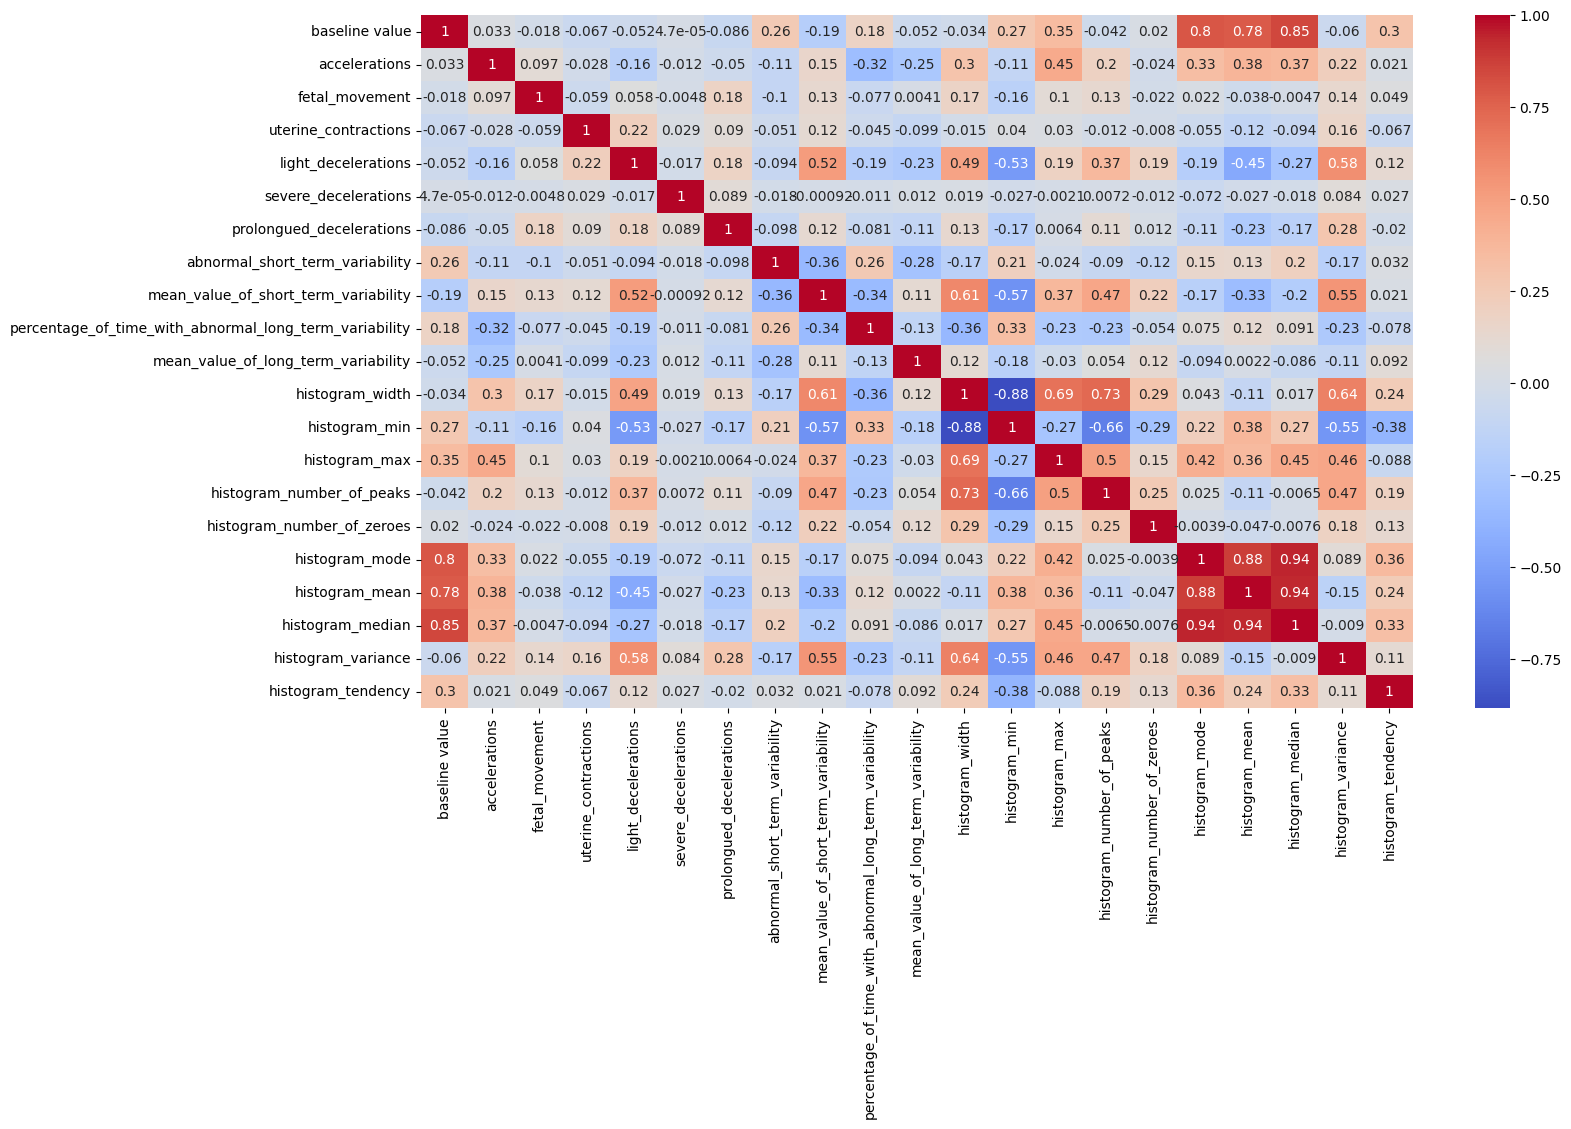

In [22]:
da.heat_map()

**---- CONCLUSIONS ----**

As evidenced in the graph above, there is a high correlation between different variables, taking into consideration apart from all those related to the histograms, since using cold logic, these will have a high correlation.

*light_decelerations:* 

    * light_decelerations w/ mean_value_of_short_term_variability.

Obviously a correlation above 0.5 has been chosen to label them as the most important variables.

In [23]:
print('                                     MOST CORRELATED FEATURES')
da.most_correlated()

                                     MOST CORRELATED FEATURES


,Most correlated feature,correlation
histogram_median,histogram_mode,0.941748
histogram_mode,histogram_median,0.941748
histogram_mean,histogram_median,0.938618
histogram_min,histogram_width,-0.882463
histogram_width,histogram_min,-0.882463
baseline value,histogram_median,0.850292
histogram_number_of_peaks,histogram_width,0.733154
histogram_max,histogram_width,0.692276
histogram_variance,histogram_width,0.639313
mean_value_of_short_term_variability,histogram_width,0.606987


**Comparison of the variables with the highest correlation between them**.

Regarding the variables of patients with suspected fetal pathology, a high correlation is found between the following pairs of variables:

As expected, most histogram variables are found to be highly correlated with each other except for some such as *baseline_value* which is found to be highly correlated with *histogram_median*.

Among the pair of variables outside the histogram variables we found several with very low correlations between them, *such as fetal_movement and prolongued_decelerations* with a correlation of 0.18.

## 2. PRE-PROCESS

In [24]:
def split_df(df,target):
    X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = target, 
                                                                        train_size=0.8, valid_size=0.1, test_size=0.1,random_state=42)
    return X_train, y_train, X_valid, y_valid, X_test, y_test  

def norm_data(X_train,X_valid, X_test):
    scaler = StandardScaler()
    return scaler.fit_transform(X_train), scaler.transform(X_valid), scaler.transform(X_test)


In [25]:
X_train, y_train, X_valid, y_valid, X_test, y_test = split_df(fetal_health,'fetal_health')

In [26]:
y_train.value_counts()

1.0    1322
2.0     231
3.0     147
Name: fetal_health, dtype: int64

An unbalance is observed between the different classes, with class 1 being predominant.

To balance these data, what we will do is to balance the data by applying different methods.

**2.1 OVER SAMPLING**

In [27]:
sm=SMOTE(random_state=42)
X_train_os,y_train_os=sm.fit_resample(X_train,y_train)
y_train_os.value_counts()

1.0    1322
2.0    1322
3.0    1322
Name: fetal_health, dtype: int64

**2.2 UNDER SAMPLING**

*2.2.1 Random Under Sampler*

In [28]:
rus = RandomUnderSampler(random_state=42)
X_train_us,y_train_us=rus.fit_resample(X_train,y_train)
y_train_us.value_counts()

1.0    147
2.0    147
3.0    147
Name: fetal_health, dtype: int64

**2.3 COMBINATION**

*2.3.1 SMOTEENN*

In [29]:
smote_enn = SMOTEENN(random_state=42)
X_train_cm_1, y_train_cm_1= smote_enn.fit_resample(X_train, y_train)
y_train_cm_1.value_counts()


3.0    1284
2.0    1253
1.0    1095
Name: fetal_health, dtype: int64

*2.3.2 SMOTETomek*

In [30]:
smote_tomek = SMOTETomek(random_state=0)
X_train_cm_2, y_train_cm_2 = smote_tomek.fit_resample(X_train, y_train)
y_train_cm_2.value_counts()

3.0    1320
1.0    1316
2.0    1316
Name: fetal_health, dtype: int64

**3. STUDY OF APPLIED DATA BALANCING METHODS WITH DATA NORMALIZATION**.

In [31]:
def dfs(X_train,y_train):
    scaler = StandardScaler()
    Xs_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    dfs=Xs_train_scaled.copy()
    dfs['fetal_health']=y_train
    return dfs


*3.1 OVER SAMPLING*

In [32]:
dfs_over = dfs(X_train_os,y_train_os)

*3.2 UNDER SAMPLING*

In [33]:
dfs_under=dfs(X_train_us,y_train_us)

*3.3 COMBINATION*

In [34]:
#SMOTEENN
dfs_cm_1=dfs(X_train_cm_1,y_train_cm_1)

#SMOTETomek
dfs_cm_2=dfs(X_train_cm_2,y_train_cm_2)

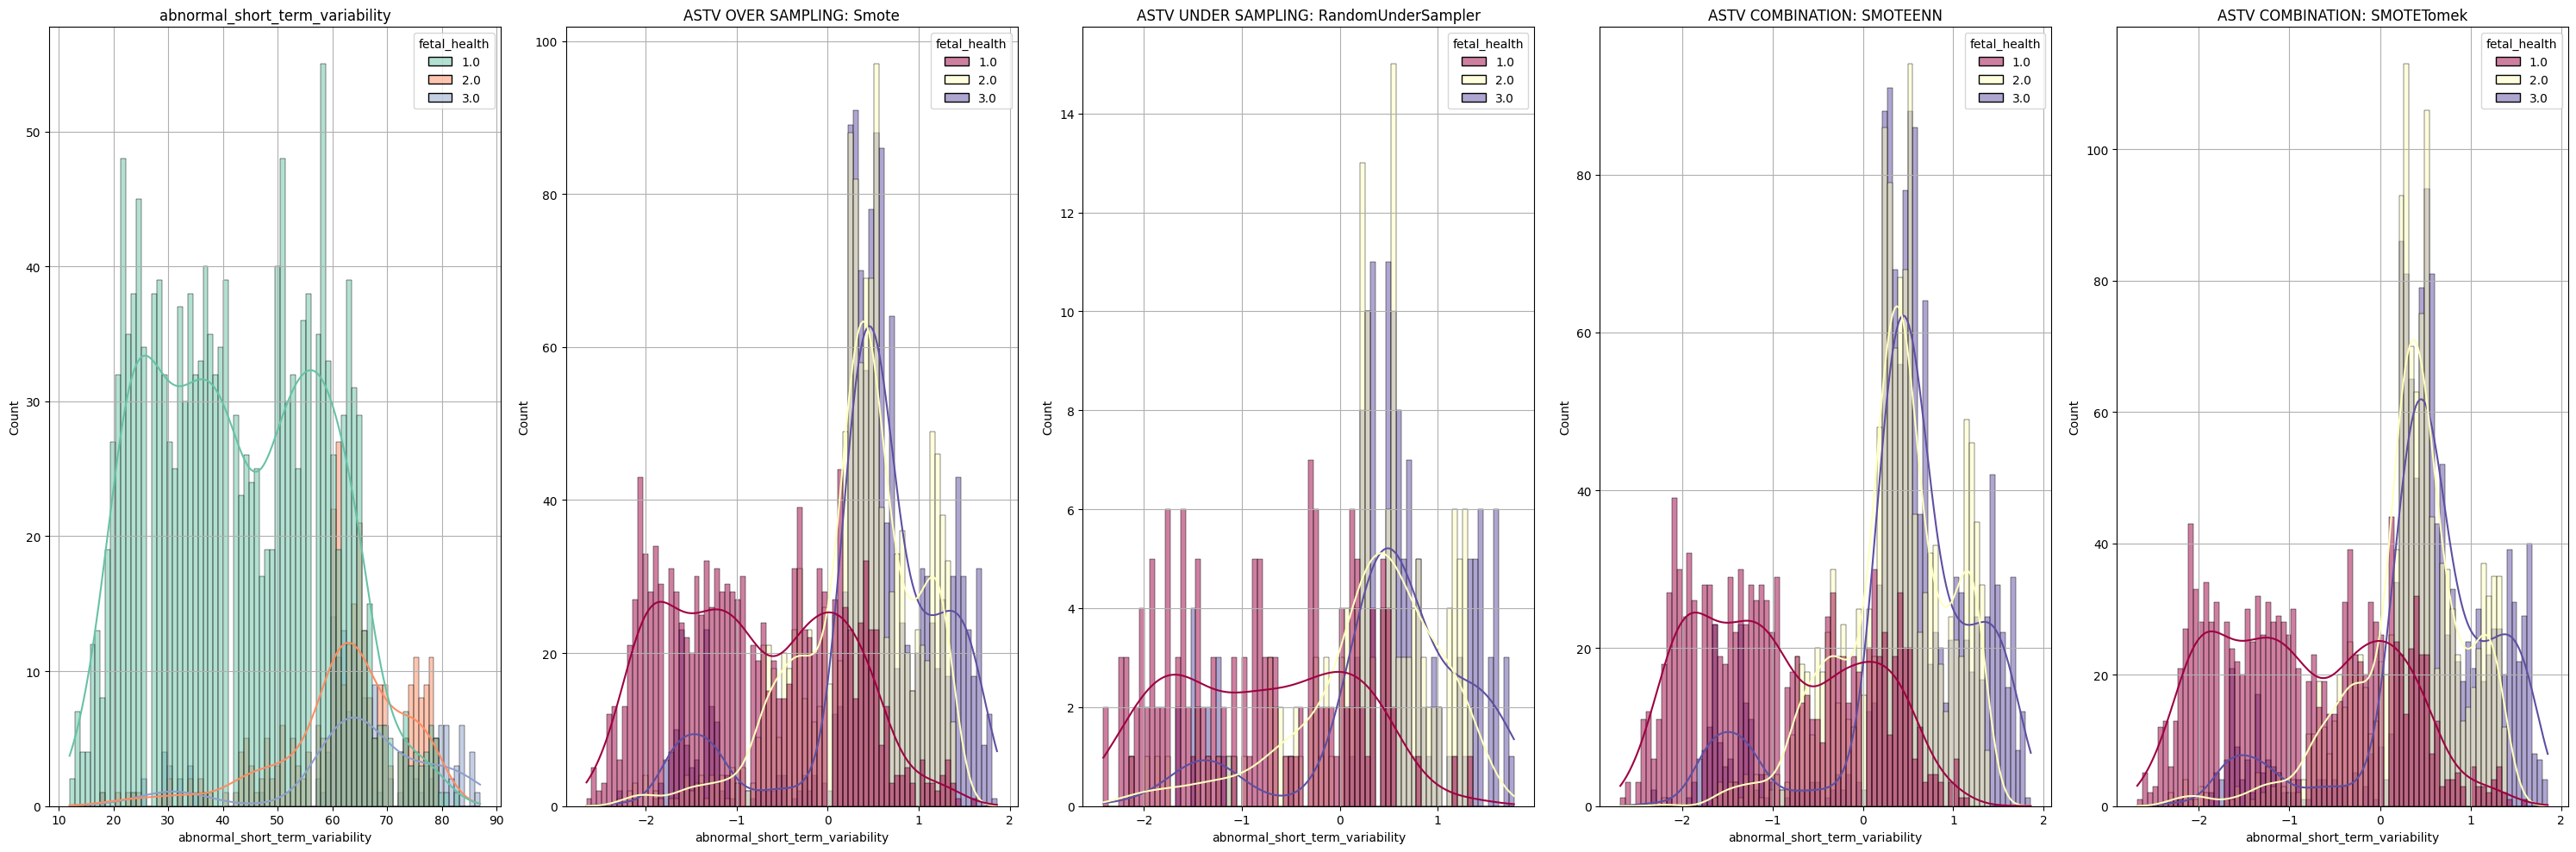

In [35]:
fig,ax=plt.subplots(1,5,figsize=(30,10))
#ax=ax.ravel()
sns.histplot(fetal_health,x='abnormal_short_term_variability',hue='fetal_health',kde=True,bins=80,ax=ax[0],palette='Set2')
ax[0].set_title('abnormal_short_term_variability')
ax[0].grid()
sns.histplot(dfs_over,x='abnormal_short_term_variability',hue='fetal_health',kde=True,bins=80,ax=ax[1],palette='Spectral')
ax[1].set_title('ASTV OVER SAMPLING: Smote')
ax[1].grid()
sns.histplot(dfs_under,x='abnormal_short_term_variability',hue='fetal_health',kde=True,bins=80,ax=ax[2],palette='Spectral')
ax[2].set_title('ASTV UNDER SAMPLING: RandomUnderSampler')
ax[2].grid()
sns.histplot(dfs_cm_1,x='abnormal_short_term_variability',hue='fetal_health',kde=True,bins=80,ax=ax[3],palette='Spectral')
ax[3].set_title('ASTV COMBINATION: SMOTEENN')
ax[3].grid()
sns.histplot(dfs_cm_2,x='abnormal_short_term_variability',hue='fetal_health',kde=True,bins=80,ax=ax[4],palette='Spectral')
ax[4].set_title('ASTV COMBINATION: SMOTETomek')
ax[4].grid()

plt.tight_layout()

**Conclusions:**

In the upper graph we can observe the differences in the results obtained according to the balancing method applied to the data. 

From these we obtain a greater distribution of the classes, as can be seen in comparison with the first histogram in which the first class is the one that predominates over the others.

To check which method is best suited to the data we have, we will apply each of them to predictive models and look at the value obtained from the f1_score.

**4. NORMALIZATION OF DATA FOR PREDICTIVE MODELS**.

In [36]:
# NORMALIZE DATA TO PREDICTIVE MODELS
# OVER SAMPLING 
X_train_os, X_val_os,X_test_os = norm_data(X_train_os,X_valid,X_test)
# UNDER SAMPLING
X_train_us,X_val_us,X_test_us = norm_data(X_train_us,X_valid,X_test)
#COMBINATION
# SMOTEENN
X_train_cm_1, X_val_cm_1, X_test_cm_1 = norm_data(X_train_cm_1,X_valid,X_test)
# SMOTETomek
X_train_cm_2, X_val_cm_2, X_test_cm_2 = norm_data(X_train_cm_2,X_valid,X_test)

## 3. ML MODELS

In [37]:
class Predict_models():
    def __init__(self, X_train,X_test,X_valid,y_train,y_test,y_valid):
        self.X_train = X_train
        self.X_test = X_test
        self.X_valid = X_valid
        self.y_train = y_train
        self.y_test = y_test
        self.y_valid = y_valid

    def logisticRegression(self, max_iter, penalty):
        return LogisticRegression(max_iter=max_iter, penalty=penalty,random_state=42).fit(self.X_train, self.y_train)

            
    
    def decisionTreeClf(self, criterion, splitter, max_depth, min_samples_leaf, min_samples_split): 
        tree_model = DecisionTreeClassifier(criterion = criterion,
                                            splitter=splitter, 
                                            max_depth = max_depth,
                                            min_samples_leaf= min_samples_leaf,
                                            min_samples_split=min_samples_split).fit(self.X_train, self.y_train)
        return tree_model
          
          

    def RandomForestClf(self,n_estimators, criterion, max_depth, max_features, min_samples_split, min_samples_leaf): 
        rf_model = RandomForestClassifier(
          n_estimators = n_estimators,
          criterion = criterion, 
          max_depth = max_depth,
          max_features = max_features,
          min_samples_split = min_samples_split,
          min_samples_leaf = min_samples_leaf).fit(self.X_train, self.y_train)
        
        return rf_model
    
    def KNclf(self,n_neighbors,weights,algorithm,leaf_size):
        neigh = KNeighborsClassifier(n_neighbors=n_neighbors,
                                     weights=weights,
                                     algorithm=algorithm,
                                     leaf_size=leaf_size).fit(self.X_train, self.y_train)
        return neigh
    
    def xgBost(self,max_depth,learning_rate,n_estimators):
        return XGBClassifier(max_depth=max_depth,learning_rate=learning_rate,n_estimators=n_estimators).fit(self.X_train, self.y_train)
        
 

In [38]:
class Hyperparameter_opt():
    def __init__(self, X_train,y_train) -> None:
        self.X_train = X_train
        self.y_train = y_train
    
    def logReg_HC(self):
        LR_params = {  
            'max_iter' :  [100, 200, 500],
            'penalty' : ['l1', 'l2', 'elasticnet', 'none']
        }
        LR = LogisticRegression(random_state=42)
        best_clf = GridSearchCV(LR, LR_params, cv= 4, verbose = True)
        best_clf.fit(self.X_train, self.y_train)
        print("Best score:", best_clf.best_score_)
        print("Best params for logistic regression:",best_clf.best_params_)
    
    def dtc_HC(self):
        DT_params = { 'criterion' :  ['gini', 'entropy', 'log_loss'], 
        'splitter' : ['best', 'random'],
        'max_depth' :  [5,10,20],
        'min_samples_leaf': [2,6,10],
        'min_samples_split': [2,6,10]}

        DT = DecisionTreeClassifier()
        best_clf = GridSearchCV(DT, DT_params, cv= 4, verbose = True)
        best_clf.fit(self.X_train, self.y_train)
        print("Best score:", best_clf.best_score_)
        print("Best params for Decision Tree regression:",best_clf.best_params_)
    
    def rfc_HC(self):
        RF_params = { 
        'criterion' :  ['gini', 'entropy', 'log_loss'], 
        'max_depth' :  [10,20],
        'n_estimators': [200,400],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [2,10],
        'min_samples_split': [2,10]
        }

        RF = RandomForestClassifier()
        best_clf = GridSearchCV(RF, RF_params, cv= 4, verbose = True) 
        best_clf.fit(self.X_train, self.y_train)
        print("Best score:", best_clf.best_score_)
        print("Best params for Random Forest regression:",best_clf.best_params_)
    
    def knc_HC(self):
        KN_params = {
        'n_neighbors': [3,4,5,6],
        'weights': ['uniform', 'distance'],
        'algorithm':['auto','ball_tree','kd_tree','brute'],
        'leaf_size': [30,50,100]
        }
        kn= KNeighborsClassifier()
        best_clf = GridSearchCV(kn, KN_params, cv= 4, verbose = True)
        best_clf.fit(self.X_train, self.y_train)
        print("Best score:", best_clf.best_score_)
        print("Best params for Random Forest regression:",best_clf.best_params_)
    
    def xgb_HC(self):
        XGB_params={
            'max_depth':range(2,10,1),
            'learning_rate': [0.1,0.01,0.05],
            'n_estimators':[50,100,150,200]
        }
        xgb = XGBClassifier()
        best_clf = GridSearchCV(xgb, XGB_params, cv= 4, verbose = True)
        best_clf.fit(self.X_train, self.y_train)
        print("Best score:", best_clf.best_score_)
        print("Best params for Random Forest regression:",best_clf.best_params_)
        


In [39]:
class Metrics(Predict_models):
  def __init__(self, X_train, X_test, X_valid, y_train, y_test, y_valid):
    super().__init__(X_train, X_test, X_valid, y_train, y_test, y_valid)

  # Confusion Matrix metric
  def confusion_matrix(self, model):
    y_pred = model.predict(self.X_test)
    return confusion_matrix(self.y_test, y_pred)
  
  def ac_score(self,model):
    y_pred_test= model.predict(self.X_test)
    y_pred_val = model.predict(self.X_valid)
    return (accuracy_score(self.y_test, y_pred_test)),(accuracy_score(self.y_valid, y_pred_val))

  def f1_score(self,model):
    y_pred_test= model.predict(self.X_test)
    y_pred_val = model.predict(self.X_valid)
    return f1_score(self.y_test, y_pred_test, average='weighted'), f1_score(self.y_valid, y_pred_val, average='weighted')


### **1. OVER SAMPLING STUDY**

#### *1.1 HyperParameter Optimization*

In [160]:
hc = Hyperparameter_opt(X_train_os, y_train_os)

In [161]:
#Logistic Regression
hc.logReg_HC()

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best score: 0.8946061427850657
Best params for logistic regression: {'max_iter': 100, 'penalty': 'none'}


In [101]:
# Decision Tree Classifier
hc.dtc_HC()

Fitting 4 folds for each of 162 candidates, totalling 648 fits
Best score: 0.9538645185703591
Best params for Decision Tree regression: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [136]:
# Random Forest Classifier
hc.rfc_HC()

Fitting 4 folds for each of 96 candidates, totalling 384 fits
Best score: 0.9788242875394682
Best params for Random Forest regression: {'criterion': 'log_loss', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


In [103]:
# KNeighborsClassifier
hc.knc_HC()

Fitting 4 folds for each of 96 candidates, totalling 384 fits
Best score: 0.9674756782819569
Best params for Random Forest regression: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 3, 'weights': 'distance'}


#### *1.2 Prediction*

In [40]:
models = Predict_models(X_train_os,X_test_os,X_val_os,y_train_os,y_test,y_valid)
metrics = Metrics(X_train_os,X_test_os,X_val_os,y_train_os,y_test,y_valid)

LOGISTIC REGRESSION

In [41]:
LR_model = models.logisticRegression(100,'none')
test_f1score_lr,val_f1score_lr = metrics.f1_score(LR_model)
accuracy_test_lr,accuracy_val_lr = metrics.ac_score(LR_model)

DECISION TREE CLASSIFIER

In [42]:
dt_model = models.decisionTreeClf('entropy','best',20,2,2)
test_f1score_dt,val_f1score_dt = metrics.f1_score(dt_model)
accuracy_test_dt,accuracy_val_dt = metrics.ac_score(dt_model)

RANDOM FOREST CLASSIFICATION

In [43]:
rf_model = models.RandomForestClf(400,'log_loss',20,'sqrt',10,2)
test_f1score_rf, val_f1score_rf = metrics.f1_score(rf_model)
accuracy_test_rf, accuracy_val_rf = metrics.ac_score(rf_model)

KKN

In [44]:
knn_model = models.KNclf(3,'distance','auto',30)
test_f1score_knn, val_f1score_knn = metrics.f1_score(knn_model)
accuracy_test_knn, accuracy_val_knn = metrics.ac_score(knn_model)

FINAL STUDY

In [45]:
final_data={
    'Accuracy_test': [accuracy_test_lr,accuracy_test_dt,accuracy_test_rf,accuracy_test_knn],
    'Accuracy_val': [accuracy_val_lr,accuracy_val_dt,accuracy_val_rf,accuracy_val_knn],
    'F1_score_test':[test_f1score_lr,test_f1score_dt,test_f1score_rf,test_f1score_knn],
    'F1_score_val': [val_f1score_lr,val_f1score_dt,val_f1score_rf,val_f1score_knn],
    'Data':['Oversampling','Oversampling','Oversampling','Oversampling']
}

df_results=pd.DataFrame(index=['Logistic_Regression','Decission_Tree','Random_Forest','KNN'],data=final_data)

In [46]:
df_results

,Accuracy_test,Accuracy_val,F1_score_test,F1_score_val,Data
Logistic_Regression,0.826291,0.859155,0.838279,0.874075,Oversampling
Decission_Tree,0.943662,0.920188,0.945235,0.921463,Oversampling
Random_Forest,0.948357,0.929577,0.948149,0.932167,Oversampling
KNN,0.892019,0.915493,0.896406,0.919971,Oversampling


Text(0.5, 1.0, 'Results obtained with Over sampling')

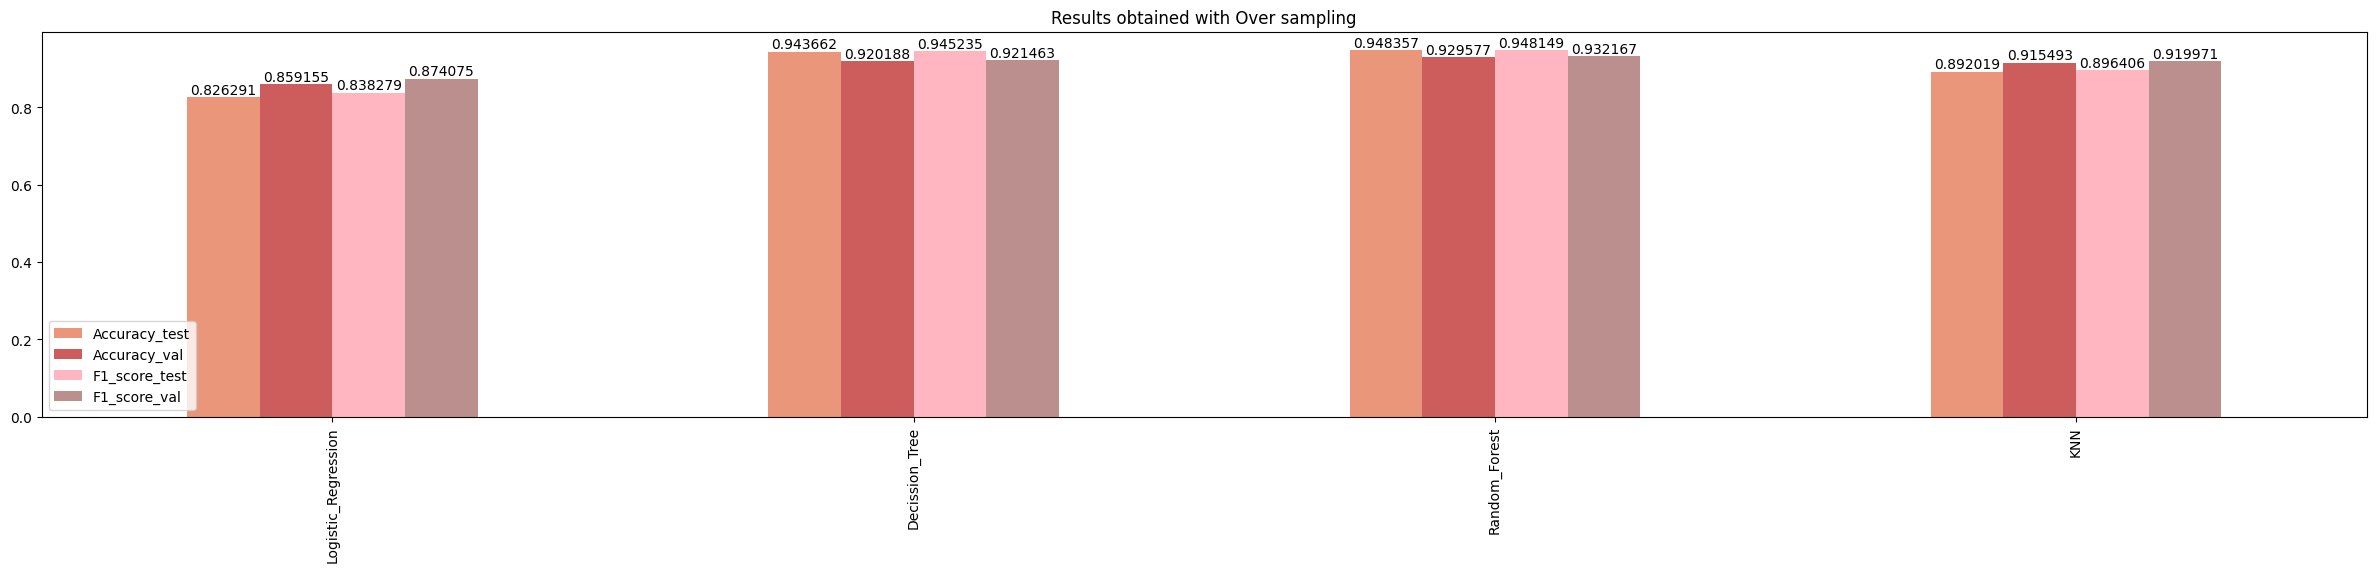

In [47]:
g=df_results.iloc[:, :-1].plot(kind='bar',figsize=(30,5),color=['#E9967A', '#CD5C5C', '#FFB6C1', '#BC8F8F'])
g.bar_label(g.containers[0],label_type='edge')
g.bar_label(g.containers[1],label_type='edge')
g.bar_label(g.containers[2],label_type='edge')
g.bar_label(g.containers[3],label_type='edge')
plt.legend(loc='lower left')
plt.title('Results obtained with Over sampling')

### **2. UNDER SAMPLING STUDY**

#### *2.1 HyperParameter Optimization*

In [48]:
hc = Hyperparameter_opt(X_train_us, y_train_us)

In [49]:
#Logistic Regression
hc.logReg_HC()

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best score: 0.8321048321048321
Best params for logistic regression: {'max_iter': 100, 'penalty': 'l2'}


In [50]:
# Decision Tree Classifier
hc.dtc_HC()

Fitting 4 folds for each of 162 candidates, totalling 648 fits
Best score: 0.8933865683865684
Best params for Decision Tree regression: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}


In [51]:
# Random Forest Classifier
hc.rfc_HC()

Fitting 4 folds for each of 96 candidates, totalling 384 fits
Best score: 0.9002047502047503
Best params for Random Forest regression: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [52]:
# KNeighborsClassifier
hc.knc_HC()

Fitting 4 folds for each of 96 candidates, totalling 384 fits
Best score: 0.8457002457002457
Best params for Random Forest regression: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 6, 'weights': 'distance'}


#### *2.2 Prediction*

In [53]:
models = Predict_models(X_train_us,X_test_us,X_val_us,y_train_us,y_test,y_valid)
metrics = Metrics(X_train_us,X_test_us,X_val_us,y_train_us,y_test,y_valid)

LOGISTIC REGRESSION

In [54]:
LR_model = models.logisticRegression(100,'l2')
test_f1score_lr,val_f1score_lr = metrics.f1_score(LR_model)
accuracy_test_lr,accuracy_val_lr = metrics.ac_score(LR_model)

DECISION TREE

In [55]:
dt_model = models.decisionTreeClf('log_loss','best',20,6,10)
test_f1score_dt,val_f1score_dt = metrics.f1_score(dt_model)
accuracy_test_dt,accuracy_val_dt = metrics.ac_score(dt_model)

RANDOM FOREST

In [56]:
rf_model = models.RandomForestClf(400,'log_loss',20,'log2',10,2)
test_f1score_rf, val_f1score_rf = metrics.f1_score(rf_model)
accuracy_test_rf, accuracy_val_rf = metrics.ac_score(rf_model)

KNN

In [57]:
knn_model = models.KNclf(3,'distance','auto',30)
test_f1score_knn, val_f1score_knn = metrics.f1_score(knn_model)
accuracy_test_knn, accuracy_val_knn = metrics.ac_score(knn_model)

FINAL STUDY

In [58]:
final_data={
    'Accuracy_test': [accuracy_test_lr,accuracy_test_dt,accuracy_test_rf,accuracy_test_knn],
    'Accuracy_val': [accuracy_val_lr,accuracy_val_dt,accuracy_val_rf,accuracy_val_knn],
    'F1_score_test':[test_f1score_lr,test_f1score_dt,test_f1score_rf,test_f1score_knn],
    'F1_score_val': [val_f1score_lr,val_f1score_dt,val_f1score_rf,val_f1score_knn],
    'Data':['Undersampling','Undersampling','Undersampling','Undersampling']
}

df_results_us=pd.DataFrame(index=['Logistic_Regression','Decission_Tree','Random_Forest','KNN'],data=final_data)

In [59]:
df_results_us

,Accuracy_test,Accuracy_val,F1_score_test,F1_score_val,Data
Logistic_Regression,0.812207,0.826291,0.826288,0.847915,Undersampling
Decission_Tree,0.863850,0.849765,0.871279,0.864600,Undersampling
Random_Forest,0.887324,0.882629,0.892728,0.891890,Undersampling
KNN,0.793427,0.826291,0.811045,0.846152,Undersampling


Text(0.5, 1.0, 'Results obtained with Under sampling')

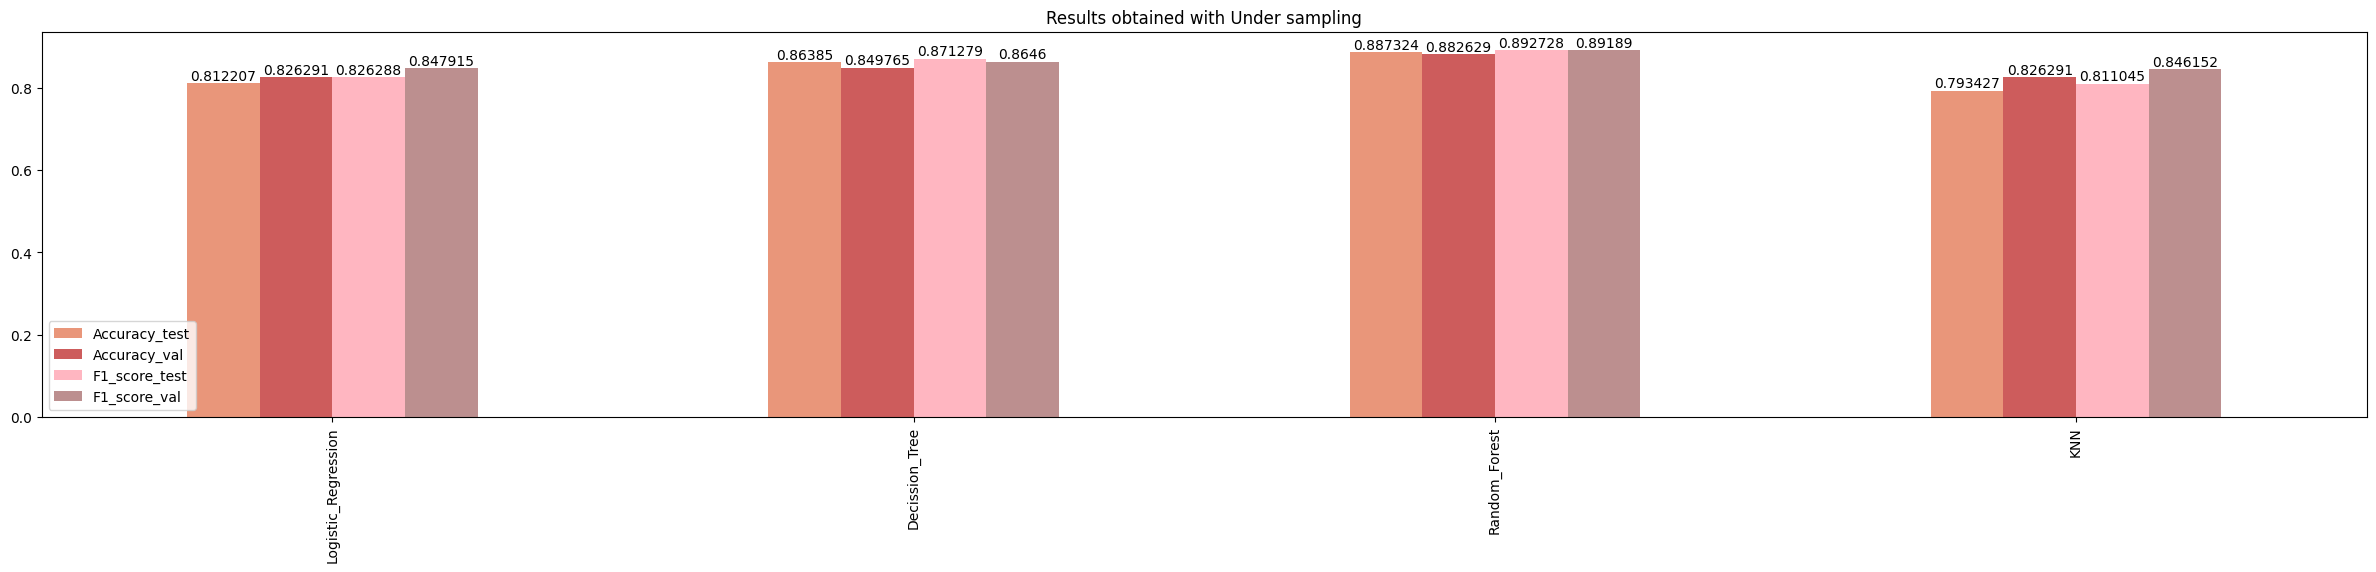

In [60]:
g=df_results_us.iloc[:, :-1].plot(kind='bar',figsize=(30,5),color=['#E9967A', '#CD5C5C', '#FFB6C1', '#BC8F8F'])
g.bar_label(g.containers[0],label_type='edge')
g.bar_label(g.containers[1],label_type='edge')
g.bar_label(g.containers[2],label_type='edge')
g.bar_label(g.containers[3],label_type='edge')
plt.legend(loc='lower left')
plt.title('Results obtained with Under sampling')

### 3. COMBINATION OVER-SAMPLING & UNDER-SAMPLING

##### SMOTEENN

3.1 *HyperParameter Optimization*

In [202]:
hc = Hyperparameter_opt(X_train_cm_1, y_train_cm_1)

In [203]:
#Logistic Regression
hc.logReg_HC()

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best score: 0.9259361233480177
Best params for logistic regression: {'max_iter': 500, 'penalty': 'none'}


In [205]:
# Decision Tree Classifier
hc.dtc_HC()

Fitting 4 folds for each of 162 candidates, totalling 648 fits
Best score: 0.977147577092511
Best params for Decision Tree regression: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 6, 'splitter': 'best'}


In [206]:
# Random Forest Classifier
hc.rfc_HC()

Fitting 4 folds for each of 96 candidates, totalling 384 fits
Best score: 0.9917400881057268
Best params for Random Forest regression: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


In [207]:
# KNeighborsClassifier
hc.knc_HC()

Fitting 4 folds for each of 96 candidates, totalling 384 fits
Best score: 0.9887114537444934
Best params for Random Forest regression: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 3, 'weights': 'distance'}


3.2 *Prediction*

In [61]:
models = Predict_models(X_train_cm_1,X_test_cm_1,X_val_cm_1,y_train_cm_1,y_test,y_valid)
metrics = Metrics(X_train_cm_1,X_test_cm_1,X_val_cm_1,y_train_cm_1,y_test,y_valid)

LOGISTIC REGRESSION

In [62]:
LR_model = models.logisticRegression(500,'none')
test_f1score_lr,val_f1score_lr = metrics.f1_score(LR_model)
accuracy_test_lr,accuracy_val_lr = metrics.ac_score(LR_model)

DECISION TREE

In [63]:
dt_model = models.decisionTreeClf('entropy','best',20,2,6)
test_f1score_dt,val_f1score_dt = metrics.f1_score(dt_model)
accuracy_test_dt,accuracy_val_dt = metrics.ac_score(dt_model)

RANDOM FOREST

In [64]:
rf_model = models.RandomForestClf(400,'gini',20,'log2',2,2)
test_f1score_rf, val_f1score_rf = metrics.f1_score(rf_model)
accuracy_test_rf, accuracy_val_rf = metrics.ac_score(rf_model)

KNN

In [69]:
knn_model = models.KNclf(3,'distance','auto',30)
test_f1score_knn, val_f1score_knn = metrics.f1_score(knn_model)
accuracy_test_knn, accuracy_val_knn = metrics.ac_score(knn_model)

FINAL STUDY

In [65]:
final_data={
    'Accuracy_test': [accuracy_test_lr,accuracy_test_dt,accuracy_test_rf,accuracy_test_knn],
    'Accuracy_val': [accuracy_val_lr,accuracy_val_dt,accuracy_val_rf,accuracy_val_knn],
    'F1_score_test':[test_f1score_lr,test_f1score_dt,test_f1score_rf,test_f1score_knn],
    'F1_score_val': [val_f1score_lr,val_f1score_dt,val_f1score_rf,val_f1score_knn],
    'Data':['SMOTEEMM','SMOTEEMM','SMOTEEMM','SMOTEEMM']
}

df_results_cm1=pd.DataFrame(index=['Logistic_Regression','Decission_Tree','Random_Forest','KNN'],data=final_data)

In [66]:
df_results_cm1

,Accuracy_test,Accuracy_val,F1_score_test,F1_score_val,Data
Logistic_Regression,0.793427,0.849765,0.811389,0.866996,SMOTEEMM
Decission_Tree,0.877934,0.892019,0.883589,0.900428,SMOTEEMM
Random_Forest,0.924883,0.924883,0.927607,0.929462,SMOTEEMM
KNN,0.793427,0.826291,0.811045,0.846152,SMOTEEMM


Text(0.5, 1.0, 'Results obtained with SMOTEENN')

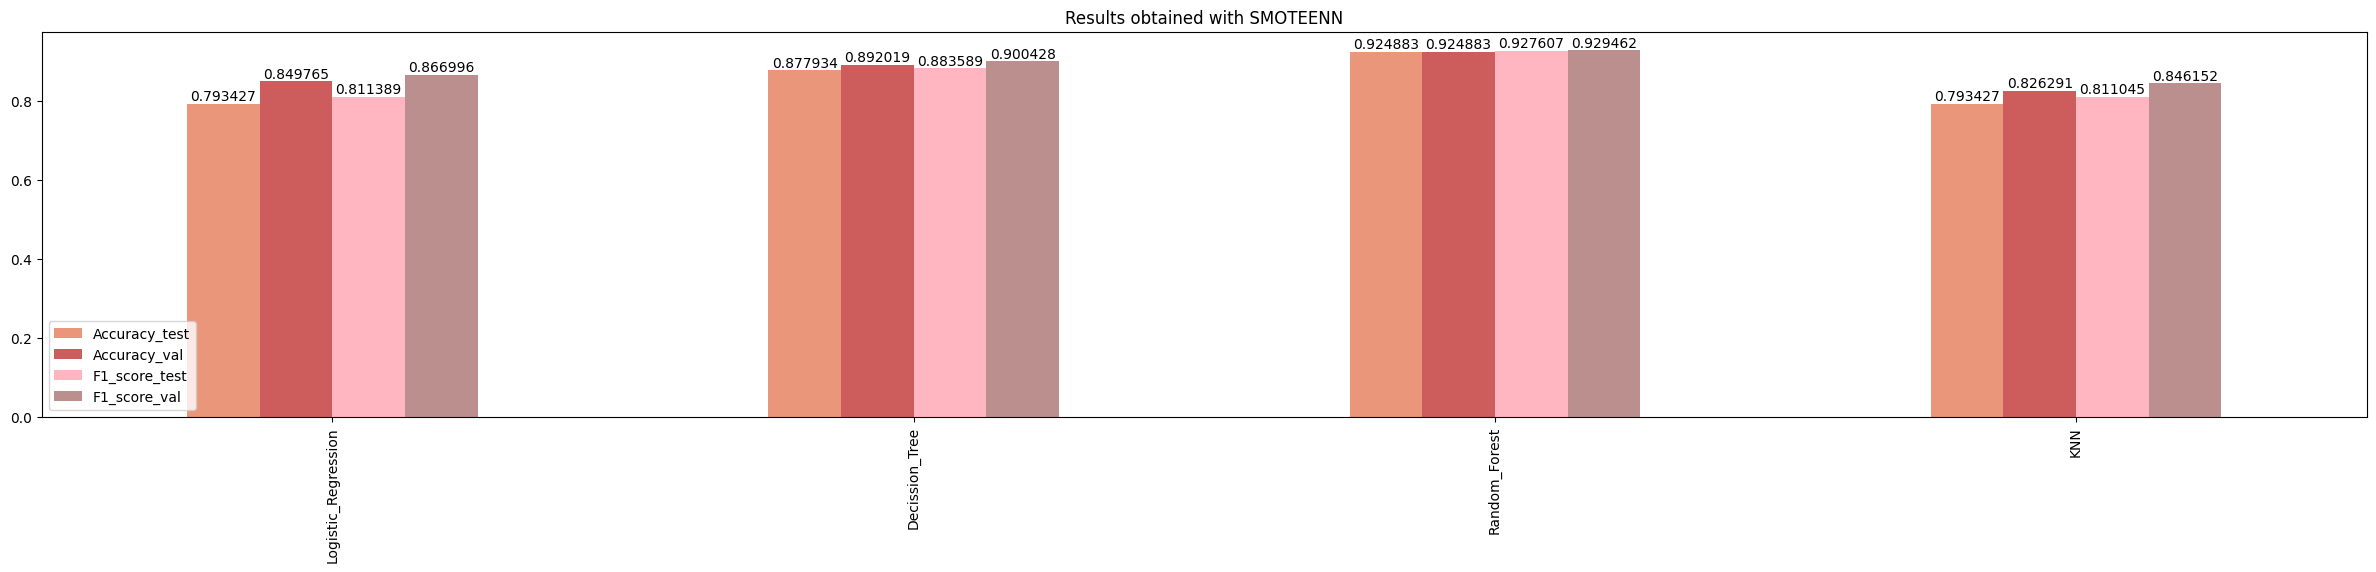

In [67]:
g=df_results_cm1.iloc[:, :-1].plot(kind='bar',figsize=(30,5),color=['#E9967A', '#CD5C5C', '#FFB6C1', '#BC8F8F'])
g.bar_label(g.containers[0],label_type='edge')
g.bar_label(g.containers[1],label_type='edge')
g.bar_label(g.containers[2],label_type='edge')
g.bar_label(g.containers[3],label_type='edge')
plt.legend(loc='lower left')
plt.title('Results obtained with SMOTEENN')

##### SMOTETomek

3.1 *HyperParameter Optimization*

In [62]:
hc = Hyperparameter_opt(X_train_cm_2, y_train_cm_2)

In [219]:
#Logistic Regression
hc.logReg_HC()

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best score: 0.9018218623481782
Best params for logistic regression: {'max_iter': 100, 'penalty': 'none'}


In [220]:
# Decision Tree Classifier
hc.dtc_HC()

Fitting 4 folds for each of 162 candidates, totalling 648 fits
Best score: 0.9536943319838056
Best params for Decision Tree regression: {'criterion': 'log_loss', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 6, 'splitter': 'random'}


In [221]:
# Random Forest Classifier
hc.rfc_HC()

Fitting 4 folds for each of 96 candidates, totalling 384 fits
Best score: 0.9764676113360323
Best params for Random Forest regression: {'criterion': 'log_loss', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


In [222]:
# KNeighborsClassifier
hc.knc_HC()

Fitting 4 folds for each of 96 candidates, totalling 384 fits
Best score: 0.9681174089068826
Best params for Random Forest regression: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 3, 'weights': 'distance'}


3.2 *Prediction*

In [68]:
models = Predict_models(X_train_cm_2,X_test_cm_2,X_val_cm_2,y_train_cm_2,y_test,y_valid)
metrics = Metrics(X_train_cm_2,X_test_cm_2,X_val_cm_2,y_train_cm_2,y_test,y_valid)

LOGISTIC REGRESSION

In [69]:
LR_model = models.logisticRegression(100,'none')
test_f1score_lr,val_f1score_lr = metrics.f1_score(LR_model)
accuracy_test_lr,accuracy_val_lr = metrics.ac_score(LR_model)

DECISION TREE

In [70]:
dt_model = models.decisionTreeClf('log_loss','random',20,2,6)
test_f1score_dt,val_f1score_dt = metrics.f1_score(dt_model)
accuracy_test_dt,accuracy_val_dt = metrics.ac_score(dt_model)

RANDOM FOREST

In [71]:
rf_model = models.RandomForestClf(400,'gini',20,'log2',2,2)
test_f1score_rf, val_f1score_rf = metrics.f1_score(rf_model)
accuracy_test_rf, accuracy_val_rf = metrics.ac_score(rf_model)

KNN

In [72]:
knn_model = models.KNclf(3,'distance','auto',30)
test_f1score_knn, val_f1score_knn = metrics.f1_score(knn_model)
accuracy_test_knn, accuracy_val_knn = metrics.ac_score(knn_model)

FINAL STUDY

In [73]:
final_data={
    'Accuracy_test': [accuracy_test_lr,accuracy_test_dt,accuracy_test_rf,accuracy_test_knn],
    'Accuracy_val': [accuracy_val_lr,accuracy_val_dt,accuracy_val_rf,accuracy_val_knn],
    'F1_score_test':[test_f1score_lr,test_f1score_dt,test_f1score_rf,test_f1score_knn],
    'F1_score_val': [val_f1score_lr,val_f1score_dt,val_f1score_rf,val_f1score_knn],
    'Data':['SMOTETomek','SMOTETomek','SMOTETomek','SMOTETomek']
}

df_results_cm2=pd.DataFrame(index=['Logistic_Regression','Decission_Tree','Random_Forest','KNN'],data=final_data)
df_results_cm2

,Accuracy_test,Accuracy_val,F1_score_test,F1_score_val,Data
Logistic_Regression,0.826291,0.859155,0.838237,0.873767,SMOTETomek
Decission_Tree,0.882629,0.906103,0.885440,0.908014,SMOTETomek
Random_Forest,0.938967,0.938967,0.938865,0.940529,SMOTETomek
KNN,0.877934,0.906103,0.883730,0.911987,SMOTETomek


Text(0.5, 1.0, 'Results obtained with SMOTETomek')

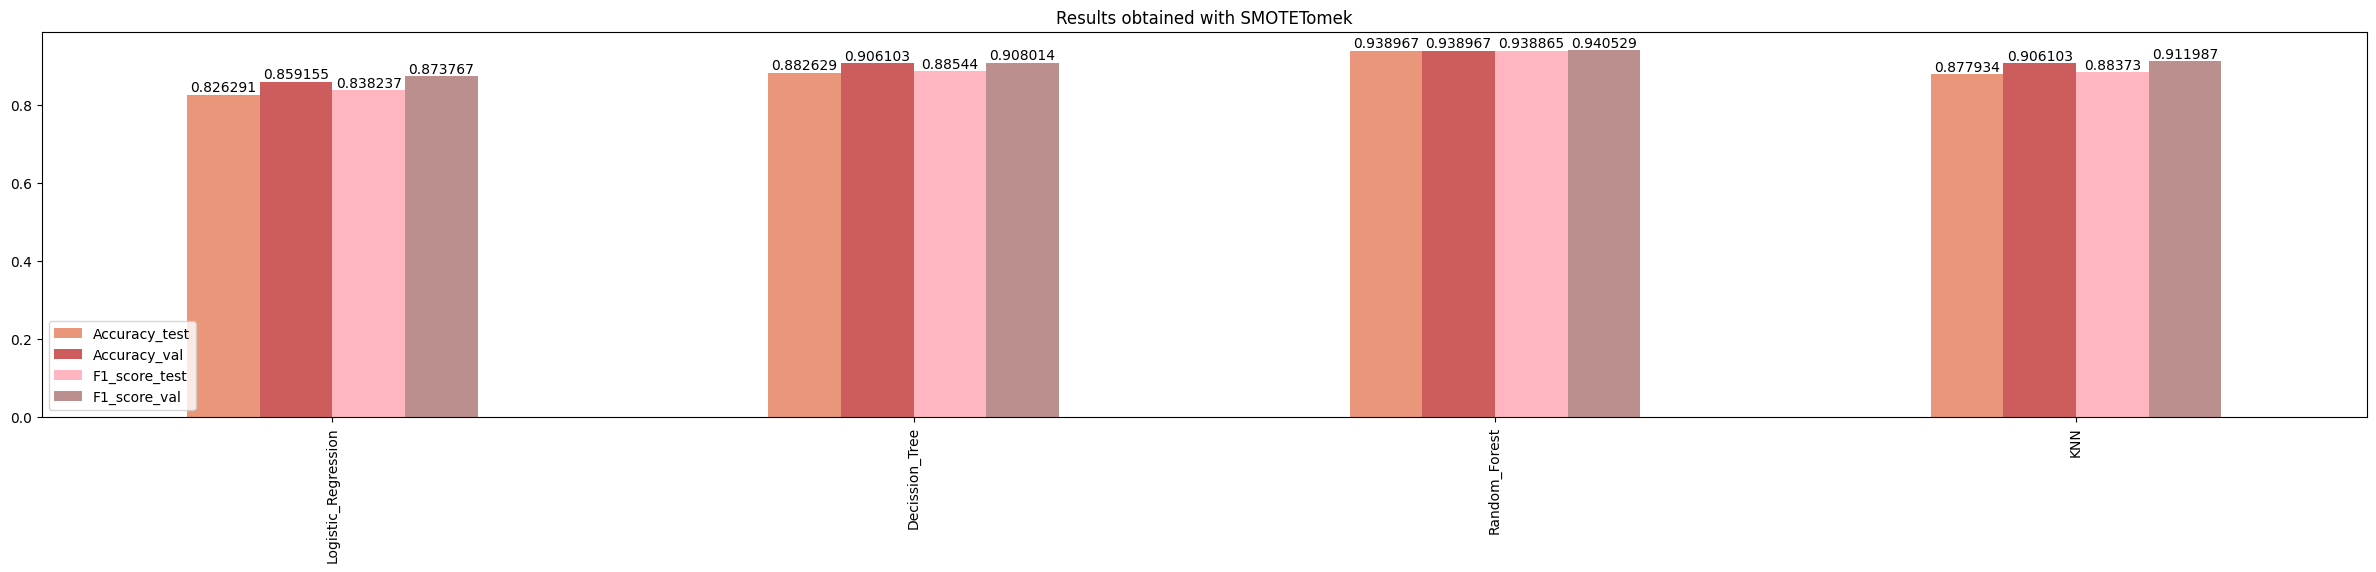

In [74]:
g=df_results_cm2.iloc[:, :-1].plot(kind='bar',figsize=(30,5),color=['#E9967A', '#CD5C5C', '#FFB6C1', '#BC8F8F'])
g.bar_label(g.containers[0],label_type='edge')
g.bar_label(g.containers[1],label_type='edge')
g.bar_label(g.containers[2],label_type='edge')
g.bar_label(g.containers[3],label_type='edge')
plt.legend(loc='lower left')
plt.title('Results obtained with SMOTETomek')

## 4. FINAL MODEL
        Method: Over sampling
        Algorithm: Random Forest

In [75]:
models  = Predict_models(X_train_os,X_test_os,X_val_os,y_train_os,y_test,y_valid)
metrics = Metrics(X_train_os,X_test_os,X_val_os,y_train_os,y_test,y_valid)

In [76]:
rf_model = models.RandomForestClf(400,'log_loss',20,'sqrt',10,2)
test_f1score_rf, val_f1score_rf = metrics.f1_score(rf_model)
accuracy_test_rf, accuracy_val_rf = metrics.ac_score(rf_model)

In [77]:
final_data={
    'Accuracy_test': [accuracy_test_rf],
    'Accuracy_val': [accuracy_val_rf],
    'F1_score_test':[test_f1score_rf],
    'F1_score_val': [val_f1score_rf],
    'Data':['SMOTE']
}

df_results_cm2=pd.DataFrame(index=['Random_Forest'],data=final_data)
df_results_cm2

,Accuracy_test,Accuracy_val,F1_score_test,F1_score_val,Data
Random_Forest,0.957746,0.929577,0.958101,0.932167,SMOTE


Text(0.5, 1.0, 'Results obtained with the best model')

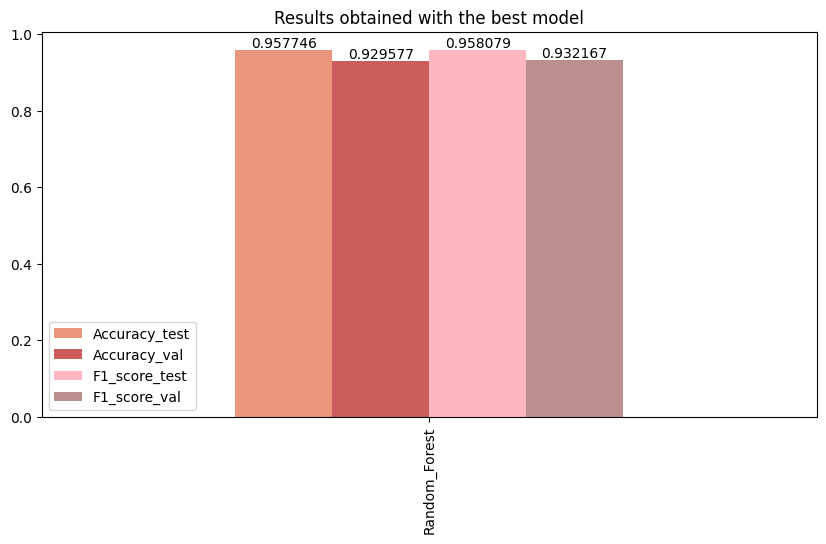

In [81]:
g=df_results_cm2.iloc[:, :-1].plot(kind='bar',figsize=(10,5),color=['#E9967A', '#CD5C5C', '#FFB6C1', '#BC8F8F'])
g.bar_label(g.containers[0],label_type='edge')
g.bar_label(g.containers[1],label_type='edge')
g.bar_label(g.containers[2],label_type='edge')
g.bar_label(g.containers[3],label_type='edge')
plt.legend(loc='lower left')
plt.title('Results obtained with the best model')

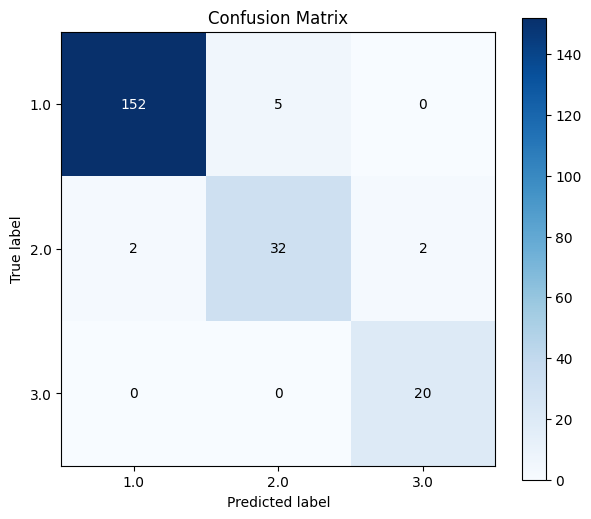

In [78]:
skplt.metrics.plot_confusion_matrix(y_test, rf_model.predict(X_test_os), normalize=False, figsize=(7,6))
plt.show()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_model.predict(X_test_os)))

              precision    recall  f1-score   support

         1.0       0.99      0.97      0.98       157
         2.0       0.86      0.89      0.88        36
         3.0       0.91      1.00      0.95        20

    accuracy                           0.96       213
   macro avg       0.92      0.95      0.94       213
weighted avg       0.96      0.96      0.96       213

